In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Reading image
img_path = "../../images/"
img_name = "face1.jpg"
img = cv.imread(img_path + img_name, cv.IMREAD_COLOR)
n_rows, n_cols = img.shape[:2]

In [5]:
div_state = np.seterr(divide='ignore')

In [6]:
def weighted_median_filtering(img, kernel_size=5):
    # Set parameters
    n_rows, n_cols = img.shape[:2]
    if kernel_size == 3:
        kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
    elif kernel_size == 5:
        kernel = np.array([[1, 2, 3, 2, 1], [2, 4, 5, 4, 2], [3, 5, 7, 5, 3], [2, 4, 5, 4, 2], [1, 2, 3, 2, 1]])
    kernel_shape = kernel.shape

    # Convert to float and make image with border
    img_copy = img.astype(np.float32) / 255
    img_copy = cv.copyMakeBorder(img_copy, int((kernel_shape[0] - 1) / 2), int(kernel_shape[0] / 2), int((kernel_shape[1] - 1) / 2), int(kernel_shape[1] / 2), cv.BORDER_REPLICATE)

    # Fill arrays for each kernel item
    img_with_areas = np.zeros(img.shape + (np.sum(kernel),), dtype=np.float32)
    cur_inx = 0
    for i in range(kernel_shape[0]):
        for j in range(kernel_shape[1]):
            # form array with same pixels
            expanded_arr = np.expand_dims(img_copy[i:i + n_rows, j:j + n_cols], axis=2)
            res = expanded_arr
            for k in range(kernel[i, j] - 1):
                res = np.concatenate((res, expanded_arr), axis=2)
            # filling
            img_with_areas[:, :, cur_inx:(cur_inx + kernel[i, j])] = res
            cur_inx += kernel[i, j]

    # Sort arrays
    img_with_areas.sort()

    # Choose layer with concrete rank
    img_new = img_with_areas[:, :, np.prod(kernel_shape) // 2]

    # Convert back
    img_new = np.clip(255 * img_new, 0, 255).astype(np.uint8)

    return img_new

In [8]:
# 1. Uniform daylight illumination
mask = np.logical_and(np.logical_and(img[:, :, 0] > 20, img[:, :, 1] > 40), img[:, :, 2] > 95)  # R>95, G>40, B>20 conditions
mask = np.logical_and(np.logical_and(mask, img[:, :, 2] > img[:, :, 1]), img[:, :, 2] > img[:, :, 0])  # R>G, R>B conditions
mask = np.logical_and(mask, np.abs(img[:, :, 2] - img[:, :, 1]) > 15)  # |R-G|>15 condition
mask = np.logical_and(mask, (np.max(img, axis=2) - np.min(img, axis=2)) > 15)  # maxRGB - minRGB > 15 condition

In [9]:
# Apply mask
new_img = np.zeros_like(mask, dtype=np.uint8)
new_img[mask] = 255

# Apply median filtering
new_img = weighted_median_filtering(new_img, 3)

True

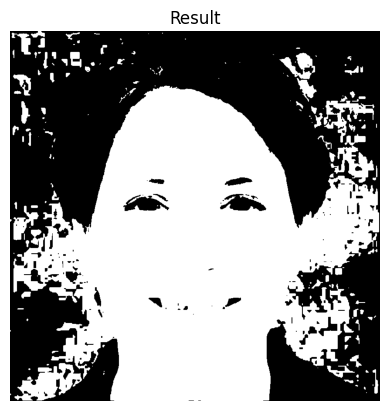

In [10]:
# Show and save binarized result
plt.imshow(new_img, cmap='gray', vmin=0, vmax=255)
plt.title("Result")
plt.axis('off')
cv.imwrite(img_path + img_name.rpartition('.')[0] + "daylight_res_bin.jpg", new_img)

(-0.5, 848.5, 848.5, -0.5)

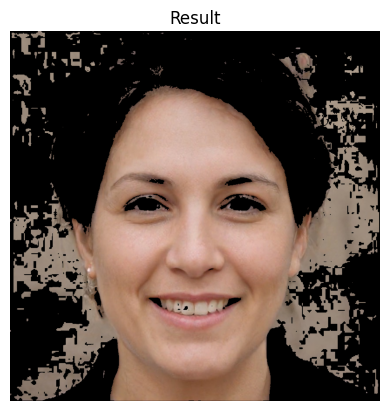

In [16]:
# Create, show and save segmentated image
new_img = np.zeros_like(img, dtype=np.uint8)
new_img[mask, :] = img[mask]
cv.imwrite(img_path + img_name.rpartition('.')[0] + "daylight_res.jpg", new_img)
new_img = cv.cvtColor(new_img, cv.COLOR_BGR2RGB)

plt.imshow(new_img, cmap='gray', vmin=0, vmax=255)
plt.title("Result")
plt.axis('off')

In [27]:
# Reading image
img_path = "../../images/"
img_name = "face4.webp"
img = cv.imread(img_path + img_name, cv.IMREAD_COLOR)
n_rows, n_cols = img.shape[:2]

In [28]:
# 2. Under flashlight or daylight lateral illumination
mask = np.logical_and(np.logical_and(img[:, :, 0] > 170, img[:, :, 1] > 210), img[:, :, 2] > 220)  # R>220, G>210, B>170 conditions
mask = np.logical_and(np.logical_and(mask, img[:, :, 1] > img[:, :, 0]), img[:, :, 2] > img[:, :, 0])  # G>B, R>B conditions
mask = np.logical_and(mask, np.abs(img[:, :, 2] - img[:, :, 1]) <= 15)  # |R-G|<=15 condition

In [29]:
# Apply mask
new_img = np.zeros_like(mask, dtype=np.uint8)
new_img[mask] = 255

# Apply median filtering
new_img = weighted_median_filtering(new_img, 3)

True

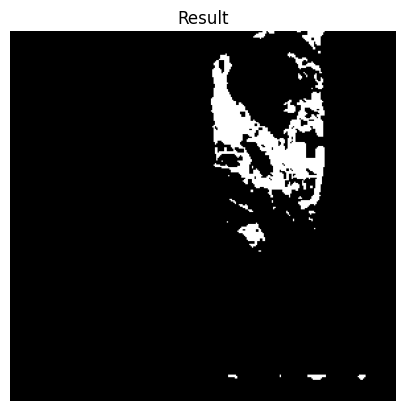

In [30]:
# Show and save binarized result
plt.imshow(new_img, cmap='gray', vmin=0, vmax=255)
plt.title("Result")
plt.axis('off')
cv.imwrite(img_path + img_name.rpartition('.')[0] + "daylight_res_bin.jpg", new_img)

(-0.5, 291.5, 279.5, -0.5)

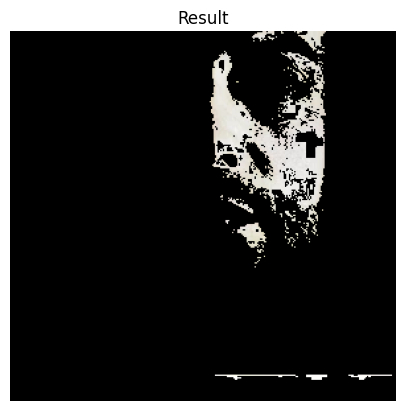

In [31]:
# Create, show and save segmentated image
new_img = np.zeros_like(img, dtype=np.uint8)
new_img[mask, :] = img[mask]
cv.imwrite(img_path + img_name.rpartition('.')[0] + "daylight_res.jpg", new_img)
new_img = cv.cvtColor(new_img, cv.COLOR_BGR2RGB)

plt.imshow(new_img, cmap='gray', vmin=0, vmax=255)
plt.title("Result")
plt.axis('off')

In [32]:
# Reading image
img_path = "../../images/"
img_name = "face2.png"
img = cv.imread(img_path + img_name, cv.IMREAD_COLOR)
n_rows, n_cols = img.shape[:2]

In [33]:
# 3. Using normalized RGB values
# Convert to initial img to float
img = img.astype(np.float64)
# Convert to normalized RGB
bgr_sum_img = np.sum(img, axis=2)
img_norm_b = np.divide(img[:, :, 0], bgr_sum_img)
img_norm_g = np.divide(img[:, :, 1], bgr_sum_img)
img_norm_r = np.divide(img[:, :, 2], bgr_sum_img)

# Create mask
denum = np.power(img_norm_r + img_norm_g + img_norm_b, 2)  # Auxiliary array
mask = np.logical_and(np.divide(np.multiply(img_norm_r, img_norm_b), denum) > 0.107, np.divide(np.multiply(img_norm_r, img_norm_g), denum) > 0.112)
mask = np.logical_and(mask, np.divide(img_norm_r, img_norm_g) > 1.185)

# Apply mask
new_img = np.zeros_like(mask, dtype=np.uint8)
new_img[mask] = 255

# Apply median filtering
new_img = weighted_median_filtering(new_img, 3)

True

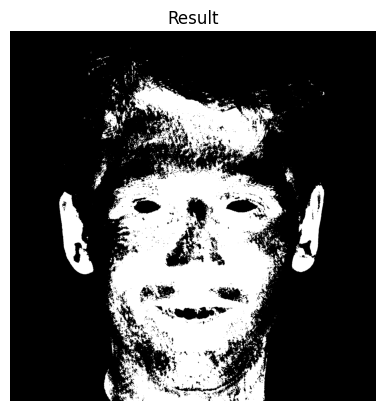

In [34]:
# Show and save mask
plt.imshow(new_img, cmap='gray', vmin=0, vmax=255)
plt.title("Result")
plt.axis('off')
cv.imwrite(img_path + img_name.rpartition('.')[0] + "daylight_res_bin.jpg", new_img)

(-0.5, 1885.5, 1907.5, -0.5)

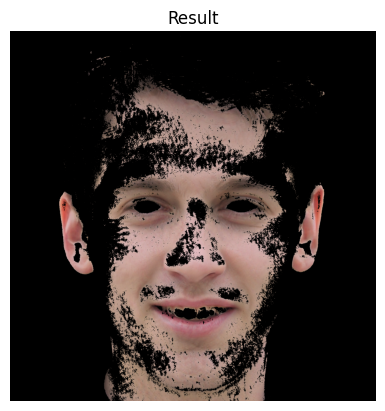

In [35]:
# Create, show and save segmentated image
new_img = np.zeros_like(img, dtype=np.uint8)
new_img[mask, :] = img[mask]
cv.imwrite(img_path + img_name.rpartition('.')[0] + "daylight_res.jpg", new_img)
new_img = cv.cvtColor(new_img, cv.COLOR_BGR2RGB)

plt.imshow(new_img, cmap='gray', vmin=0, vmax=255)
plt.title("Result")
plt.axis('off')